# Understanding and Predicting Customer Churn
 
*Author - Ashima Marwaha*<br>
*Email - ashima.marwaha6@gmail.com*

#### I am quite interested in retail, and when I found a dataset on customer churn in the Telecom industry it piqued my interest, and I knew I wanted to work on it!
    
#### While it is important to acquire new customers to drive business and profits, it is equally important to focus on customer retention. Research studies estimate that it costs five to ten times more to acquire a new customer than to retain an existing one. Also, loyal customers are likely to spend more.

#### Moreover, it is important to understand the reasons for churn, otherwise companies risk losing newly acquired customers as well.
    
#### This project aims to gain an understanding of the resaons behind customer churn and build a model to predict which customers are most likely to churn.
    
#### This is a relatively clean however imbalanced dataset, and provides ample opportunity to explore the data, make some meaningful visulizations, derive insights and build machine learning algorithms to make predictions.
    
#### Here's a brief data dictionary:

* Customers who left within the last month – this column is called **Churn**
* Services that each customer has signed up for – **phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies**
* Customer account information – **how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges**
* Demographic information about customers – **gender, age range, and if they have partners and dependents**   

In [1]:
#Importing dataframe libraries
import numpy as np
import pandas as pd

#Importing vizualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.io as pio
pio.renderers

# Setting the display options to be able to see the entire dataset in our output
pd.set_option('display.max_columns', 1500)
pd.set_option('display.max_rows', 1500)

# Importing libraries for machine learning
from sklearn.utils import resample
from imblearn.over_sampling import (SMOTE, ADASYN)
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, auc, roc_curve, 
                             classification_report, confusion_matrix)



import warnings
warnings.filterwarnings("ignore")

## 1. Loading in the Dataset

In [2]:
#Importing the dataset

df = pd.read_csv('data/teleco_churn.csv')

# Peeking into our dataset

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
# Examining the number of rows and columns in our dataset

print(f'The number of rows in the dataset are: {df.shape[0]} and the number of columns are: {df.shape[1]}.')

The number of rows in the dataset are: 7043 and the number of columns are: 21.


In [4]:
# Checking if the dataset is balanced
# Looking at the Churn column to see how many customers churned

df['Churn'].value_counts()/df.shape[0]*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [5]:
# Checking for duplicate rows

print(f'Duplicated rows: {df.duplicated().sum()}')

# Sanity check      

df[df.duplicated()]

Duplicated rows: 0


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

<br>The dataset provides infomation on customer, contracts and if he/she churned or not. There are 21 columns and around 7040 rows. There are no duplicated rows. The dataset is not balanced with a churn rate of around 27%. This is something that I'll have to work on before building any model to make predictions.<br>

* The `customerID` column is the unique identifier for the dataset. I'll set this as the index.


* The column- `Churn` provides information on whether a customer has churned or not. This is a nominal categorical column. It is the `target` column, ie, using the dataset I'll be trying to predict whether the customer has churned or not. Also, I'll try to gather insights on features (variables/columns) that have a considerable impact on whether a customer churns or not.


* The dataset includes information on the services and the contract the customer has signed up for.


* It also delves into the demographic information about customers- their age, gender, if they have partners and dependents.
    
The following is the data dictionary:<br>

| Column | Selected|
|:--------|:---------|
|customerID|Unique Identifier|
|gender|Whether the customer is a male or a female|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)
|Partner|Whether the customer has a partner or not (Yes, No)
|Dependents|Whether the customer has dependents or not (Yes, No)
|tenure|Number of months the customer has stayed with the company
|PhoneService|Whether the customer has a phone service or not (Yes, No)
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)
|Contract|The contract term of the customer (Month-to-month, One year, Two year)
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
|MonthlyCharges|The amount charged to the customer monthly
|TotalCharges|The total amount charged to the customer
|Churn|Whether the customer churned or not (Yes or No)   

In [6]:
# Setting customerID as the index of the dataframe

df = df.set_index('customerID')

# Sanity check

df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

---

## 2. What's your type!

In [7]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [8]:
# Looking at the summary statistics for the numerical columns
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Barring three columns- `SeniorCitizen`, `tenure` and `MonthlyCharges`, all the other columns have object data types.
    
The data type for the `Total Charges` column doesn't seem to be right. It should be ideally float, but it is object here. This is something to be looked into.
    
Also, prima facie there doesn't seem to be any null values. However, we will check for it explicitely later.

Many of the columns like partner, dependent, PhoneServices seem to be binary nominal categorical columns which can be easily converted to numerical columns. Let's take a deeper dive, and look at the unique column values for the categorical columns, so that we can assess how we could convert them into numerical columns.   

In [9]:
#Count of unique values of the categorical columns

# Looping through the columns and selectings the ones which have object data 
# and printing the value counts of each of those columns

for column in df.columns:
    if df[column].dtype == 'O':
        print(df[column].value_counts())
        print('-------------------------------------------')
        print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------


No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------


No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------


Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------------------


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-------------------------------------------


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
----------------

The **Total Charges** column is missing some values (11 to be precise), these are coded as spaces. That's the reason for the incorrect data type for this column. I'll fix the missing values and convert the column into float data type.
    
I'll convert the categorical columns into numerical ones later.

---

## 3. Breaking up

I'm going to split the datasets into an 80% of training set and rest into the test set, before I apply any transformations or fix the missing values. 

This will ensure that there is no data leakage from the train into the test set. Also, this will help to reduce any bias that might creep in when testing the model accuracy on the test set. 

In [10]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

# Stratify helps to ensure that the dataset is split in such a way that the composition of the split datasets
# is same in terms of the column used for stratifying. I'll use the Churn column t

train, test= train_test_split(df, test_size=0.2, random_state=1, stratify=df['Churn']) 

print(f'The train set has {train.shape[0]} data points.')
print(f'The test set has {test.shape[0]} data points.')

The train set has 5634 data points.
The test set has 1409 data points.


I'll use the train set for the exploratory analysis and to gather insights. 

I'll perform whatever transformations or feature engineering I'll do with the train set, in the end on the test set at one go before I begin with the modelling.

---

## 4. Fixing the null values

Earlier we noticed that there are no explicite null values in the dataset.

However, the **Total Charges** column contains some null values which have been coded in the dataset as 'spaces'.

Let's look into it, and decide how to tackle these missing values.

In [11]:
# Confirming again if there are any null values

missing_values = pd.DataFrame(round(train.isna().sum()/train.shape[0]*100, 2)).reset_index()

missing_values.columns = ['Column_Name', 'Percentage_Null_Values']

missing_values

Column_Name  Percentage_Null_Values
0             gender                     0.0
1      SeniorCitizen                     0.0
2            Partner                     0.0
3         Dependents                     0.0
4             tenure                     0.0
5       PhoneService                     0.0
6      MultipleLines                     0.0
7    InternetService                     0.0
8     OnlineSecurity                     0.0
9       OnlineBackup                     0.0
10  DeviceProtection                     0.0
11       TechSupport                     0.0
12       StreamingTV                     0.0
13   StreamingMovies                     0.0
14          Contract                     0.0
15  PaperlessBilling                     0.0
16     PaymentMethod                     0.0
17    MonthlyCharges                     0.0
18      TotalCharges                     0.0
19             Churn                     0.0

So, there are no missing values in the train set. Let's check the Total Charges column now.

In [12]:
# Looking at the Total Charges column where it's values are missing

train[train['TotalCharges']== ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7644-OMVMY    Male              0     Yes        Yes       0          Yes   
3115-CZMZD    Male              0      No        Yes       0          Yes   
3213-VVOLG    Male              0     Yes        Yes       0          Yes   
1371-DWPAZ  Female              0     Yes        Yes       0           No   
4472-LVYGI  Female              0     Yes        Yes       0           No   
4075-WKNIU  Female              0     Yes        Yes       0          Yes   

               MultipleLines InternetService       OnlineSecurity  \
customerID                                                          
7644-OMVMY                No              No  No internet service   
3115-CZMZD                No              No  No internet service   
3213-VVOLG               Yes              No  No internet service   
1371-DWPAZ  No phone service             DSL                  Yes   
4472-LVYGI  No phone service             DSL                  Yes   
4075-WKNIU               Yes             DSL                   No   

                   OnlineBackup     DeviceProtection          TechSupport  \
customerID                                                                  
7644-OMVMY  No internet service  No internet service  No internet service   
3115-CZMZD  No internet service  No internet service  No internet service   
3213-VVOLG  No internet service  No internet service  No internet service   
1371-DWPAZ                  Yes                  Yes                  Yes   
4472-LVYGI                   No                  Yes                  Yes   
4075-WKNIU                  Yes                  Yes                  Yes   

                    StreamingTV      StreamingMovies  Contract  \
customerID                                                       
7644-OMVMY  No internet service  No internet service  Two year   
3115-CZMZD  No internet service  No internet service  Two year   
3213-VVOLG  No internet service  No internet service  Two year   
1371-DWPAZ                  Yes                   No  Two year   
4472-LVYGI                  Yes                   No  Two year   
4075-WKNIU                  Yes                   No  Two year   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
customerID                                                               
7644-OMVMY               No               Mailed check           19.85   
3115-CZMZD               No               Mailed check           20.25   
3213-VVOLG               No               Mailed check           25.35   
1371-DWPAZ               No    Credit card (automatic)           56.05   
4472-LVYGI              Yes  Bank transfer (automatic)           52.55   
4075-WKNIU               No               Mailed check           73.35   

           TotalCharges Churn  
customerID                     
7644-OMVMY                 No  
3115-CZMZD                 No  
3213-VVOLG                 No  
1371-DWPAZ                 No  
4472-LVYGI                 No  
4075-WKNIU                 No

For all the missing values, the Contract is for Two year. We could use the median/mean for Total Charges for customers with a two-year contract for filling in those values. I'll check the distribution of this column to check which would be a better statistic to use in this case.

Also, none of the customers are senior citizens and most have partners and dependents. The contract information is quite varied.

Also, I want to look if there is any correlation between the total charges to monthly charges to assess how to go about this.

In [13]:
# Replacing the 'spaces' with null values and correcting the data type

train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan).astype(float)


# Sanity check

train[train['TotalCharges']== ' ']

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

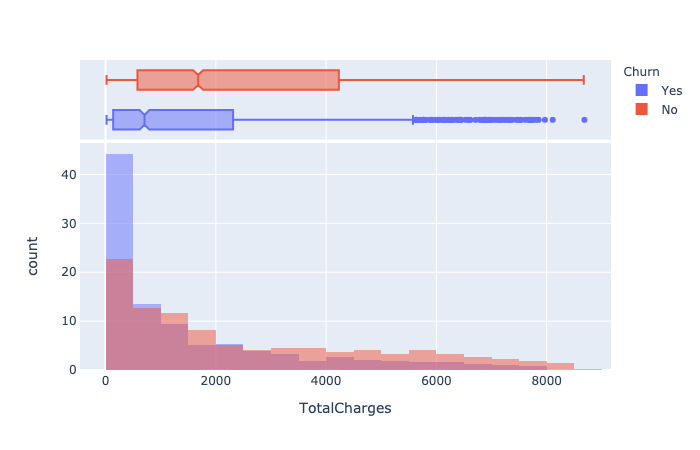

In [14]:
# Plotting Total Charges column and looking at it's distribution

fig = px.histogram(train, x="TotalCharges", color="Churn",marginal="box", width=800, height=600,
                   opacity=0.5, histnorm="percent", nbins=35)
fig.update_layout(barmode='overlay')
fig.show(renderer='png')

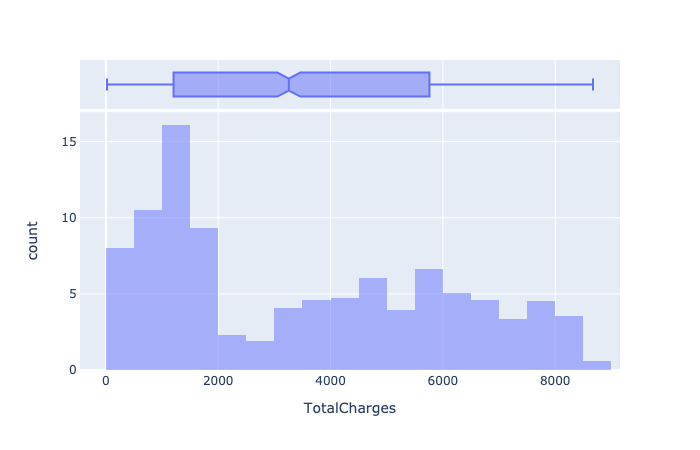

In [15]:
# Creating a dataframe with Contract = Two years, Senior Citizen = 0 and Churn = No

selected_df = train[(train['Contract']== 'Two year') & (train['SeniorCitizen']== 0) & (train['Churn']== 'No')]

# Plotting Total Charges column again and looking at it's distribution

fig = px.histogram(selected_df, x="TotalCharges", marginal="box", width=800, height=600,
                   opacity=0.5, histnorm="percent", nbins=35)
fig.update_layout(barmode='overlay')
fig.show(renderer='png')

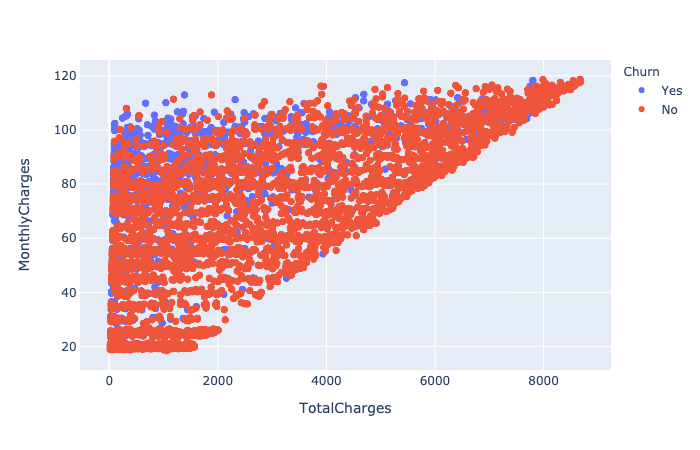

In [16]:
# Plotting a scatter diagram of the total charges and monthly charges column

fig = px.scatter(train, x="TotalCharges", y= 'MonthlyCharges', color="Churn")
fig.update_layout(barmode='overlay')
fig.show(renderer='png')

In [17]:
# Median of Total Charges column

print(f"Median of Total Charges column: {train['TotalCharges'].median()}")


# Median of Total Charges column with Two year contract

print(f"Median of Total Charges column with two year contract: {train.groupby('Contract').median()['TotalCharges']['Two year']}")


# Median of Total Charges column with Two year contract, churn = no, senior citizen = 0

print(f"Median of Total Charges column with two year contract, churn = No, senior citizen = 0: {selected_df['TotalCharges'].median()}")

Median of Total Charges column: 1391.4
Median of Total Charges column with two year contract: 3593.8
Median of Total Charges column with two year contract, churn = No, senior citizen = 0: 3257.225


So, the Total Charges column is positively skewed, with many outliers.<br>

The column for when churn is no, contract is of two years and customer is not a senior citizen is also positively skewed, but is relatively more normally distributed!

Because the data is skewed with many outliers, I'll choose **median** to fill in the null values. In this case, the **mean** would not be that good a representative of the data as mean quite sensitive to outliers, which are a plenty in this case.

Also, looking at the scatter plot between the Total charges and the Monthly charges columns, apparently there is doesn't seem to be a very clear relationship, so I'll not use it for filling in the null values.
    
Looking at the median values for the Total Chrages column vs when the contract is for two years, the values are quite different since the range for this column is between 20 to approximately 8500.
    
Further, the median with contract for two years does not change drastically when we filter out the data fo churn and if the customer is a senior citizen or not. To avoid overfitting the data, I'll simply use only the contract information.

In [18]:
# Replacing null values with median
train['TotalCharges'].fillna(train.groupby('Contract').median()['TotalCharges']['Two year'], inplace = True)

# Converting the Total Charges data type to float

train['TotalCharges']= train['TotalCharges'].astype(float)

# Sanity check

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7181-BQYBV to 7831-QGOXH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

Awesome! So all the null values have been fixed. Let's dig in deeper and try to derive some insights from the data by creating visualizations.

---

## 5. Visualizations

Much of the data is categorical, with only three numerical columns - tenure, total charges and monthly charges.

I want to look at the distribution of the numerical columns. And check their linear correlation.
    
For the categorical columns, I'm planning to make 100% stacked columns to check their distribution across customers who churned and those who stayed on.

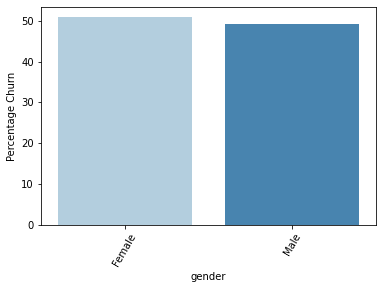

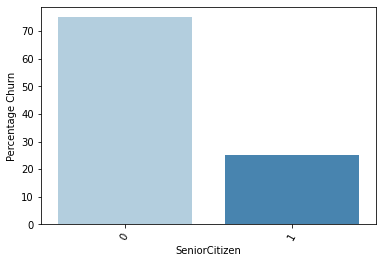

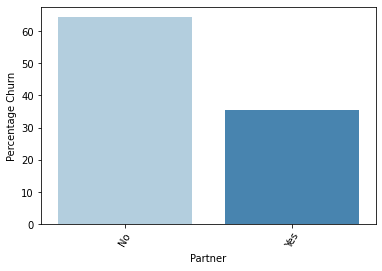

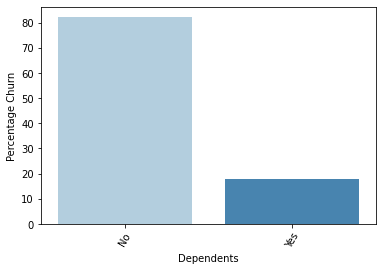

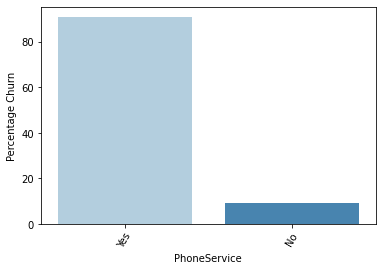

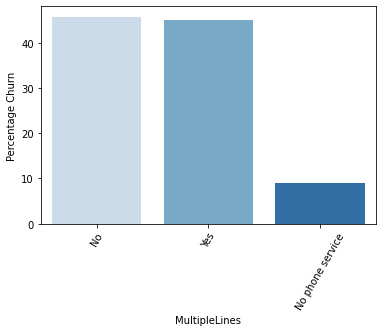

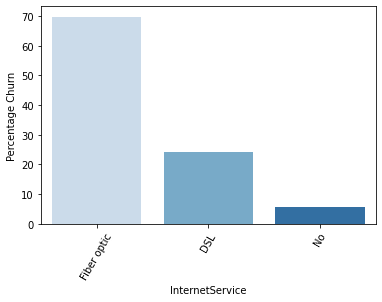

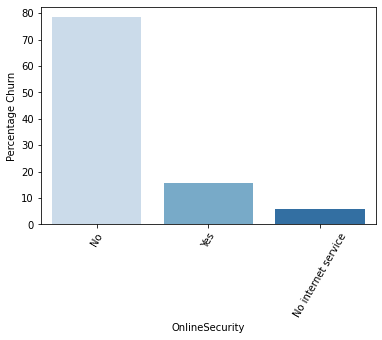

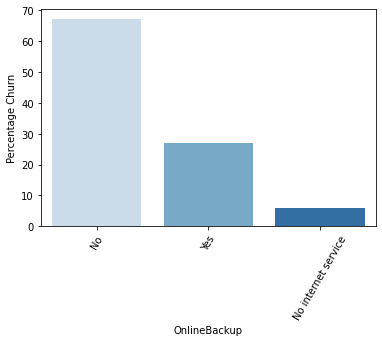

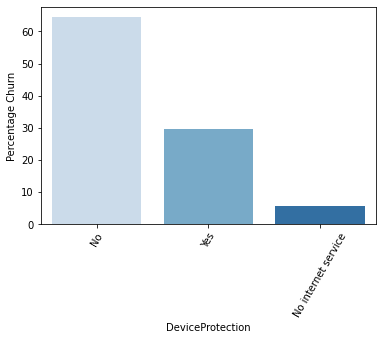

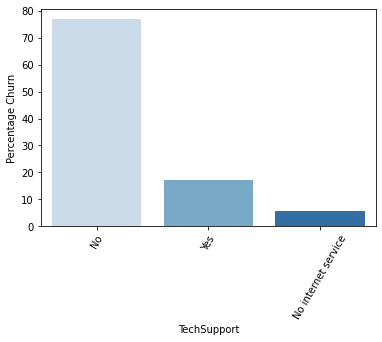

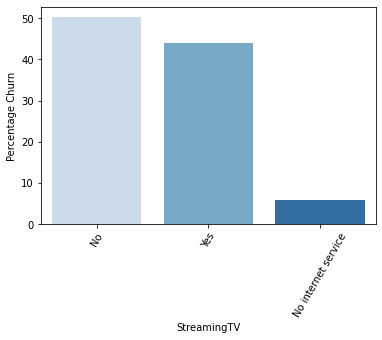

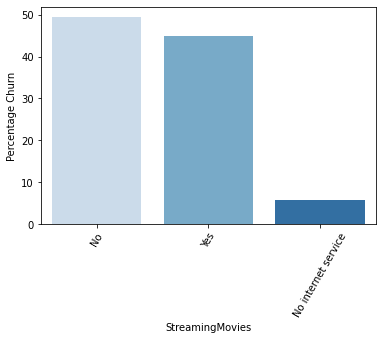

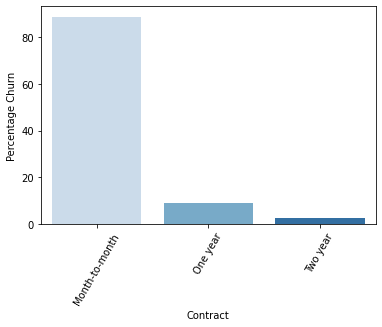

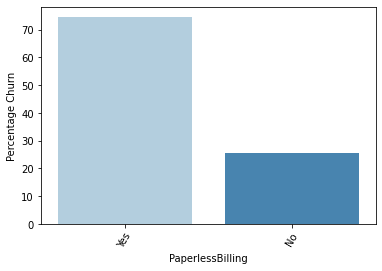

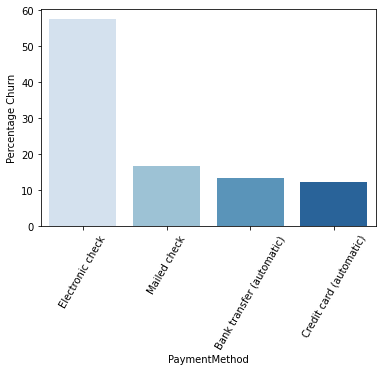

In [19]:
# Creating a dictionary for transforming the 'Churn' column into a binary column
# Yes: 1 and No:0
transformation_dict = {'Yes':'1', 'No':'0'}

# Using the dictionary to apply the transformations
train['Churn_numeric'] = train['Churn'].map(transformation_dict)

train['Churn_numeric'] = train['Churn_numeric'].astype(int)


# Plotting the categorical columns 

# Defining a function to plot the graphs using Seaborn

def barplot_maker(column):
    
    """
    Function for plotting bar graphs of categorical columns using Seaborn showing the percentage of
    the customers who churned across the values in the column 
    
    Input: Name of the column one wants to plot
    
    Output: Bar graph representing the percentage churn across the various in the column.
    
    """
    col = (train.groupby(column).sum()['Churn_numeric']/train['Churn_numeric'].sum()*100).sort_values(ascending=False)
    
    graph = sns.barplot(x =col.index, y=col.values, palette="Blues")
    plt.xlabel(column)
    plt.ylabel('Percentage Churn')
    plt.xticks(rotation=60)
    return plt.show()



# Looping through the categorical columns to plot the bar graphs

for column in train.columns[:-2]: # Not including Churn and Churn Numeric which are the last two columns
    # Senior Citizen is an int column: No is coded as 0 and Yes is coded as 1
    if (train[column].dtype == 'O') or column == 'SeniorCitizen': 
        barplot_maker(column)

Looking at the above graphs, we can infer the following:

* Percentage churn is similar for both the genders and also for streaming services for TV and movies.

* Customers with no partners or dependents are more likely to churn than those who have either partners or depenedents.

* Customers with basic services and who don't opt for online security/ online banking/ device protection have a higher likelihood of churn.

* Also, the shorter the contract, the more the chances of churn.

* Further, customers with fibre-optic internet services, paperless billing options and electronic check payment method are more possible to leave.


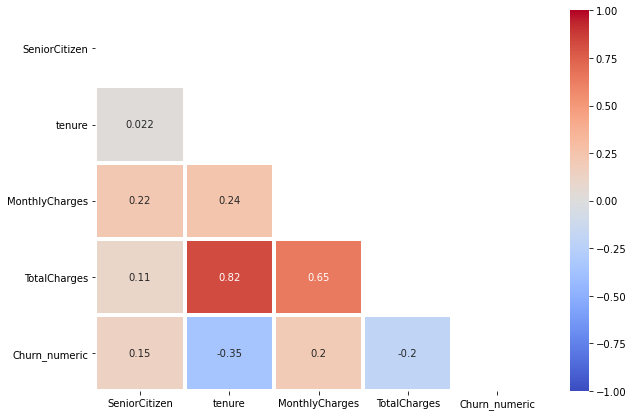

In [20]:
# Let's take a look at the numerical columns

# Looking at the correlation between the numerical columns

# Creating a matrix of zeroes mask for our correlation heatmap to hide the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Creating the heatmap and using the mask we created
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), cmap='coolwarm', center=0,annot=True, linewidths=3, vmin=-1, vmax=1, mask=mask)
plt.show()

<br>There seems to be a high correlation between the Total Charges and Tenure columns.
    
Also, the Total Charges and the Monthly Charges are moderately correlated.

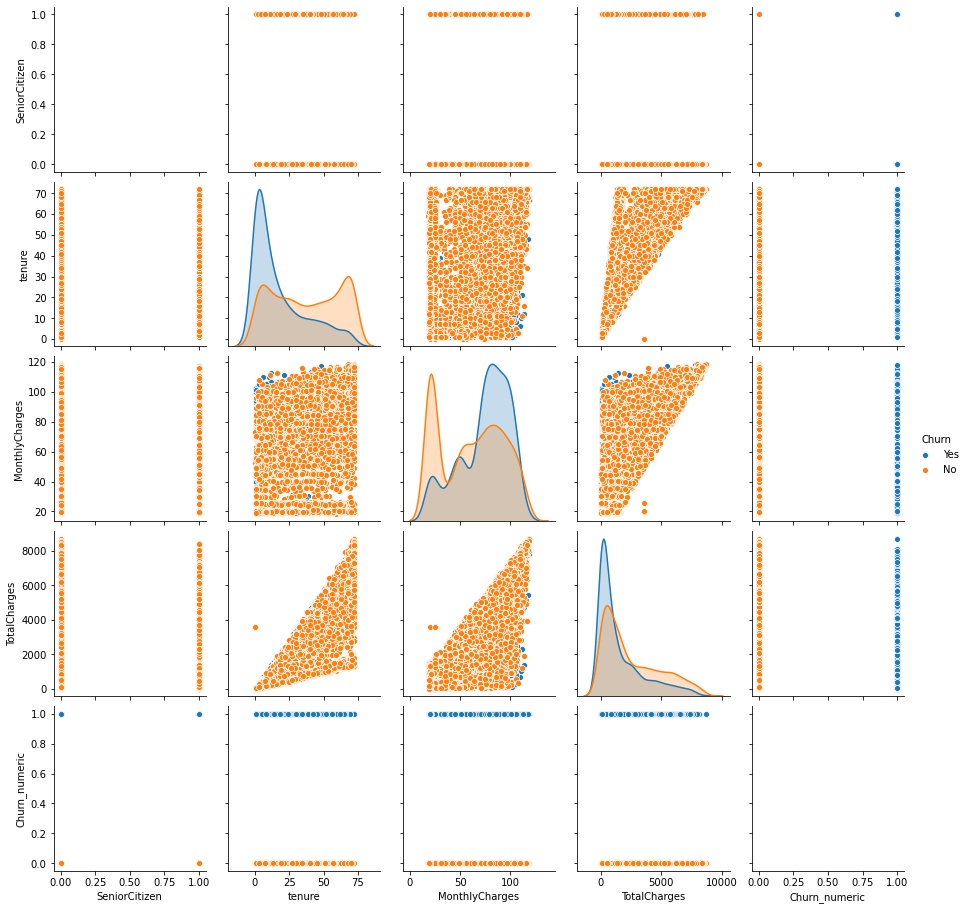

In [21]:
sns.pairplot(data=train, hue='Churn')

In [22]:
# Let's look at how total charges and tenure affect 

fig = px.scatter(train, x='TotalCharges', y ='tenure', color='Churn', width=800, height=600, template="none", opacity=0.5)
fig.show()

<br>Since, the data is imbalanced, we have a lot more of the orange dots representing no churn. The orange dots are more concentrated near the bottom left of the graph, representing customers with shorter tenure and lower total charges.
    
There are more blues, i.e., customers who left, towards the right of the graph where the total charges are higher.

In [23]:
# Let's look at how monthly charges and tenure affect 

fig = px.scatter(train, x='MonthlyCharges', y ='tenure', color='Churn', width=800, height=600, template="none", opacity=0.5)
fig.show()

<br>In this, we can still find a relatively better distinction between the churn and no churn, with most of the customer Since, the data is imbalanced, we have a lot more of the orange dots representing no churn. The orange dots are more concentrated near the bottom left of the graph, represnting customers with shorter tenure and lower total charges.
    
There are more blues, i.e., customers who left, towards the right of the graph where the total charges are higher, and the tenure is shorter.

---

## 6. Some Insights

From the visulations we can infer that:

* Customers with basic services are more ikely to churn, thus it might do good to  **offer some services like tech support or online protection either free or may be at a promotional rate**. This might help to improve the customer experience and loyalty, and thus reduce chances of churn.
    
* Also, customers with no dependents or partners have more chances of leaving, thus, promotional deals for this segment who have opted for basic facilities could be focussed upon.
    
* Also, the shorter the contract, the more the chances of churn. Thus, **deals with longer contract should be made more enticing for the customers**. 

* Further, customers with fibre-optic internet services, paperless billing options and electronic check payment method are more possible to leave.

---

## 7. You're my type

I'll convert the **coulmns with yes and no inputs**, into a binary column - 0 for no and 1 for yes.
The **columns with three inputs - Yes, No and No internet service**, I'm thinking of:
- converting the 'No internet service' value to 'No', and then convert the 'Yes' to 1 and 'No' to 0. This way we might risk losing some information, but we will be more efficient.
- or maybe one-hot encode these columns. This will be more rigrous, however more computationally expensive too.
- I'm not label encoding these columns as that would make more sense when we have interval or ordinal type of data.
I'll try the first two approaches and test with vanilla logistic regression (without hyper parameter tuning), and use the approach which produces better results. If there's not much difference, I'll use the first approach.

The rest of the columns which have 3 or more input variables, I'll one-hot encode them.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7181-BQYBV to 7831-QGOXH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null 

In [25]:
# Converting the binary categorical columns into 0 for No, and 1 for Yes
# SeniorCitizen and Churn are already converted into numerical columns

binary_cat_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Creating a dictionary for transforming the column into a binary column
# Yes: 1 and No:0
transformation_dict = {'Yes':1, 'No':0}

# Using the dictionary to apply the transformations
for col in binary_cat_cols:
    train[col] = train[col].map(transformation_dict)
    
# Transforming the Gender column
# Creating a dictionary for transforming the column into a binary column
# Female: 1 and Male:0
transformation_dict_gender = {'Female':1, 'Male':0}
train['gender'] = train['gender'].map(transformation_dict_gender)
    
# Dropping the Churn categorical col as we have the numerical one now
train = train.drop('Churn', axis=1)

# Sanity check
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7181-BQYBV to 7831-QGOXH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   int64  
 16  PaymentMethod     5634 non-null 

In [26]:
# Creating dummy variables for columns- Internet Service, Contract and Payment Method

data_dummy = train[['InternetService', 'Contract', 'PaymentMethod']]
data_cat_dum = pd.get_dummies(data_dummy, drop_first=True)

# Recombine these columns and drop the original ones from the dataframe
train = pd.concat([train, data_cat_dum], axis=1).drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7181-BQYBV to 7831-QGOXH
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int64  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   int64  
 6   MultipleLines                          5634 non-null   object 
 7   OnlineSecurity                         5634 non-null   object 
 8   OnlineBackup                           5634 non-null   object 
 9   DeviceProtection                       5634 non-null   object 
 10  TechSupport                            5634 non-null   object 

In [27]:
# Converting remaining categorical columns with three values by trying two options and
# then testing through logistic regression

option1 = train.copy()

option2 = train.copy()

# Option 1 : Converting the 'No internet service/ phone service' value to 'No', 
# and convert the 'Yes' to 1 and 'No' to 0. 

# This way we might risk losing some information, but we will be more efficient.

rem_cat_cols_1 = train.nunique()[train.nunique()==3].index[1:]

# Creating a dictionary for transforming the columns
transformation_dict_1 = {'Yes':1, 'No':0,  'No internet service':0}
transformation_dict_2 = {'Yes':1, 'No':0,  'No phone service':0}

# Using the dictionary to apply the transformations
for col in rem_cat_cols_1:
    option1[col] = option1[col].map(transformation_dict_1)
    
option1['MultipleLines'] = option1['MultipleLines'].map(transformation_dict_2)

# Testing through logistic regression

X_train_1 = option1.drop(['Churn_numeric'], axis=1)

y_train_1 = option1['Churn_numeric']

logreg = LogisticRegression()
baseline_logreg = logreg.fit(X_train_1, y_train_1)

print(f'Option 1 Accuracy on train set: {baseline_logreg.score(X_train_1, y_train_1)}\n')

pred_1 = baseline_logreg.predict(X_train_1)
print(f'Option 1 Classification Report: \n\n {classification_report(y_train_1, pred_1)}')
print('___________________________________________________________________________')
print('\n')



# option 2: Creating dummy variables

rem_cat_cols_2 = train.nunique()[train.nunique()==3].index

data_dummy = option2[rem_cat_cols_2]
data_cat_dum = pd.get_dummies(data_dummy, drop_first=True)

# Recombine these columns and drop the original ones from the dataframe

option2 = pd.concat([option2, data_cat_dum], axis=1).drop(rem_cat_cols_2, axis=1)

# Testing through logistic regression

X_train_2 = option2.drop(['Churn_numeric'], axis=1)

y_train_2 = option2['Churn_numeric']

logreg = LogisticRegression()
baseline_logreg = logreg.fit(X_train_2, y_train_2)

print(f'Option 2 Accuracy on train set: {baseline_logreg.score(X_train_2, y_train_2)}\n')

pred_2 = baseline_logreg.predict(X_train_2)
print(f'Option 2 Classification Report: \n\n {classification_report(y_train_2, pred_2)}')


Option 1 Accuracy on train set: 0.806354277600284

Option 1 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.75      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634

___________________________________________________________________________


Option 2 Accuracy on train set: 0.8024494142705005

Option 2 Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4139
           1       0.66      0.54      0.59      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



The accuracy for predicting churn is in fact slightly better with the first option where I had converted 'No internet service' to 'No', with similar recall and precision.

Since the first option is also computationally less expensive, I'll go ahead with it.

In [28]:
# Finally correcting the remaining data types
rem_cat_cols = train.nunique()[train.nunique()==3].index[1:]

# Creating a dictionary for transforming the columns
transformation_dict_1 = {'Yes':1, 'No':0,  'No internet service':0}
transformation_dict_2 = {'Yes':1, 'No':0,  'No phone service':0}

# Using the dictionary to apply the transformations
for col in rem_cat_cols:
    train[col] = train[col].map(transformation_dict_1)
    
train['MultipleLines'] = train['MultipleLines'].map(transformation_dict_2)

# Sanity check
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 7181-BQYBV to 7831-QGOXH
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int64  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   int64  
 6   MultipleLines                          5634 non-null   int64  
 7   OnlineSecurity                         5634 non-null   int64  
 8   OnlineBackup                           5634 non-null   int64  
 9   DeviceProtection                       5634 non-null   int64  
 10  TechSupport                            5634 non-null   int64  

Perfect! Now, we have all the columns in the form to do modelling.

---

## 8. The balancing act

During initial data exploration, I realized that the dataset is imbalanced with far more customers who had not churned. Also, when I employed logistic regression to pick the transformation for the columns in the above section,  the precision and recall values for the churned customers were quite low, which essentially means that the model is not able to predict churn well.

To rectify this issue, I'll work towards balancing the dataset so that we have an equal proportion of churned and not churned customers in the dataset.

There are various techniques that one could employ to balance the dataset:

**Undersampling**: Undersampling consists of deleting observations from your over-represented class. Since, I have not much data, I won't be going for this option.

**Oversampling**: This approach creates copies of the data from the underrepresented class. 

**SMOTE**: Synthetic Minority Over-sampling Technique or SMOTE creates synthetic samples of the data, so rather than taking copies of observations, SMOTE uses a distance measure to create synthetic samples of data points that would not be far from the actual data points. 

**ADASYN**: Adaptive Synthetic Sampling Method looks at the density distribution of the data to determine the number of samples that will be generated. 

I'll employ the last three techniques, and test the results with vanilla logistic regression to decide which approach to use.

In [29]:
# Looking at the percentage of churned customers in the dataset

df['Churn'].value_counts()/df.shape[0]*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [30]:
# Oversampling minority class

# Separate minority and majority class
churn = train[train['Churn_numeric']==1]
not_churn = train[train['Churn_numeric']==0]

# upsample minority class
churn_upsampled = resample(churn, replace=True, n_samples= len(not_churn))

# Combine majority and upsapmled minorty data
train_upsampled = pd.concat([not_churn, churn_upsampled])

# Check value counts of the upsampled data
print(f'There is equal distribution of classes in the target column: \n{train_upsampled["Churn_numeric"].value_counts()}')

# Testing if our logistic regression model is able to predict churn better with upsampling 

X_train_upsampled = train_upsampled.drop(['Churn_numeric'], axis=1)

y_train_upsampled = train_upsampled['Churn_numeric']

logreg = LogisticRegression()
upsampled_logreg = logreg.fit(X_train_upsampled, y_train_upsampled)


# Printing earlier accuracy without upsampling for easy reference
print(f'\n\nWithout Upsampling Accuracy on train set: {baseline_logreg.score(X_train_2, y_train_2)}\n')
print(f'Without Upsampling Classification Report: \n\n {classification_report(y_train_2, pred_2)}')

# Getting accuracy score and classification report with Upsampling
print(f'\n\nUpsampled Accuracy on train set: {upsampled_logreg.score(X_train_upsampled, y_train_upsampled)}\n')
pred_upsampled = upsampled_logreg.predict(X_train_upsampled)
print(f'Upsampled Classification Report: \n\n {classification_report(y_train_upsampled, pred_upsampled)}')

There is equal distribution of classes in the target column: 
1    4139
0    4139
Name: Churn_numeric, dtype: int64


Without Upsampling Accuracy on train set: 0.8024494142705005

Without Upsampling Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4139
           1       0.66      0.54      0.59      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



Upsampled Accuracy on train set: 0.7698719497463156

Upsampled Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.74      0.76      4139
           1       0.76      0.80      0.78      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278



With the Upsampling technique, the overall accuracy has gone down. But we are getting better at predicting the Churn class. There is a 10 point increase in both the precision and recall for the churn class. But this is still not good, I want to try SMOTE and ADASYN before finalizing whhich technique to use in my case.

In [31]:
# Trying SMOTE now

X_train = train.drop(['Churn_numeric'], axis=1)
y_train = train['Churn_numeric']


# Performing SMOTE
sm = SMOTE()
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train, y_train)


# Testing if our logistic regression model is able to predict churn better with SMOTE
logreg = LogisticRegression()
SMOTE_logreg = logreg.fit(X_train_SMOTE, y_train_SMOTE)


# Printing accuracy and classification report for Upsampled dataset for easy reference
print(f'Upsampled Accuracy on train set: {upsampled_logreg.score(X_train_upsampled, y_train_upsampled)}\n')
print(f'Upsampled Classification Report: \n\n {classification_report(y_train_upsampled, pred_upsampled)}')


# Getting accuracy and classification report for SMOTE dataset
print(f'\n\nSMOTE Accuracy on train set: {SMOTE_logreg.score(X_train_SMOTE, y_train_SMOTE)}\n')
pred_SMOTE = SMOTE_logreg.predict(X_train_SMOTE)
print(f'SMOTE Classification Report: \n\n {classification_report(y_train_SMOTE, pred_SMOTE)}')

Upsampled Accuracy on train set: 0.7698719497463156

Upsampled Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.74      0.76      4139
           1       0.76      0.80      0.78      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278



SMOTE Accuracy on train set: 0.8213336554723363

SMOTE Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      4139
           1       0.81      0.84      0.83      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



With SMOTE, not only the overall accuracy, but both precision and recall have increased considerably as compared to even the upsampling technique.

Now, I want to try the **ADASYN** (Adaptive Synthetic Sampling Method). It is an improved way to apply SMOTE, as it looks at the density distribution of the data to determine the number of samples that will be generated. 

In [32]:
# Trying ADASYN now

X_train = train.drop(['Churn_numeric'], axis=1)
y_train = train['Churn_numeric']

ad = ADASYN(sampling_strategy='auto')
X_train_ADASYN, y_train_ADASYN = ad.fit_sample(X_train, y_train)


# Testing if our logistic regression model is able to predict churn better with SMOTE
logreg = LogisticRegression()
ADASYN_logreg = logreg.fit(X_train_ADASYN, y_train_ADASYN)


# Printing accuracy and classification report for SMOTE dataset for easy reference
print(f'SMOTE Accuracy on train set: {SMOTE_logreg.score(X_train_SMOTE, y_train_SMOTE)}\n')
print(f'SMOTE Classification Report: \n\n {classification_report(y_train_SMOTE, pred_SMOTE)}')


# Getting accuracy and classification report for ADASYN dataset
print(f'\n\nADASYN Accuracy on train set: {ADASYN_logreg.score(X_train_ADASYN, y_train_ADASYN)}\n')
pred_ADASYN = ADASYN_logreg.predict(X_train_ADASYN)
print(f'ADASYN Classification Report: \n\n {classification_report(y_train_ADASYN, pred_ADASYN)}')

SMOTE Accuracy on train set: 0.8213336554723363

SMOTE Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      4139
           1       0.81      0.84      0.83      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



ADASYN Accuracy on train set: 0.8201292484442317

ADASYN Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.79      0.81      4139
           1       0.81      0.85      0.83      4217

    accuracy                           0.82      8356
   macro avg       0.82      0.82      0.82      8356
weighted avg       0.82      0.82      0.82      8356



Since with the ADASYN the overall accuracy as weel as the precision and recall have dropped, I'll employ SMOTE to balance the dataset.

In [34]:
# Performing SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

# Sanity check
y_train.value_counts()

1    4139
0    4139
Name: Churn_numeric, dtype: int64

Awesome! So, at last I can start with building a machine learning model to predict churn. But before that, I'll apply all the transformations that I performed on the train set on the test set as well.

---

## 9. One last step

I'll be performing all the transformations that I did on the train set on the test, so that both are in the same format, and we can make predictions for the test set and compare accuracies.



In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 7976-CICYS to 5709-LVOEQ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   int64  
 2   Partner           1409 non-null   object 
 3   Dependents        1409 non-null   object 
 4   tenure            1409 non-null   int64  
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1409 non-null 

In [36]:
# Filling in the null values and changing the data type to float
test['TotalCharges'] = test['TotalCharges'].replace(' ', np.nan).astype(float)
test['TotalCharges']= test['TotalCharges'].fillna(test.groupby('Contract').median()['TotalCharges']['Two year'])

# Converting the binary categorical columns into 0 for No, and 1 for Yes
# SeniorCitizen is already into numerical format
binary_cat_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Creating a dictionary for transforming the column into a binary column
# Yes: 1 and No:0
transformation_dict = {'Yes':1, 'No':0}

# Using the dictionary to apply the transformations
for col in binary_cat_cols:
    test[col] = test[col].map(transformation_dict)
    
# Renaming the Churn column
test.rename(columns = {'Churn': 'Churn_numeric'}, inplace=True)

# Transforming the Gender column
# Creating a dictionary for transforming the column into a binary column
# Female: 1 and Male:0
transformation_dict_gender = {'Female':1, 'Male':0}
test['gender'] = test['gender'].map(transformation_dict_gender)
    

# Creating dummy variables for columns- Internet Service, Contract and Payment Method
data_dummy = test[['InternetService', 'Contract', 'PaymentMethod']]
data_cat_dum = pd.get_dummies(data_dummy, drop_first=True)

# Recombine these columns and drop the original ones from the dataframe
test = pd.concat([test, data_cat_dum], axis=1).drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)

# Finally correcting the remaining data types
rem_cat_cols = test.nunique()[test.nunique()==3].index

# Creating a dictionary for transforming the columns
transformation_dict_1 = {'Yes':1, 'No':0,  'No internet service':0}
transformation_dict_2 = {'Yes':1, 'No':0,  'No phone service':0}

# Using the dictionary to apply the transformations
for col in rem_cat_cols:
    if col == 'MultipleLines':
        test[col] = test[col].map(transformation_dict_2)
    else:
        test[col] = test[col].map(transformation_dict_1)

# Sanity check
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 7976-CICYS to 5709-LVOEQ
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 1409 non-null   int64  
 1   SeniorCitizen                          1409 non-null   int64  
 2   Partner                                1409 non-null   int64  
 3   Dependents                             1409 non-null   int64  
 4   tenure                                 1409 non-null   int64  
 5   PhoneService                           1409 non-null   int64  
 6   MultipleLines                          1409 non-null   int64  
 7   OnlineSecurity                         1409 non-null   int64  
 8   OnlineBackup                           1409 non-null   int64  
 9   DeviceProtection                       1409 non-null   int64  
 10  TechSupport                            1409 non-null   int64  

In [37]:
X_test = test.drop(['Churn_numeric'], axis=1)
y_test = test['Churn_numeric']

---

## 10. Predicting churn


Now, I'll finally build a machine learning model to predict churn. I'm thinking of trying **Logistic Regression**, **Tree based models** and **XG Boost**. 

In [38]:
# Split train data into train and validation sets

X_train, X_validation, y_train, y_validation= train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_validation)} data points.')

The train set has 6622 data points.
The validation set has 1656 data points.


There is quite a range in the values of the categorical columns which have only 0 and 1 as their values, and the other numerical columns. Some machine learning algorithms work better when the data is scaled, so that the model is not heavily influenced by columns with extreme values.

I'll use the MinMax scaler to scale the dataset. The Minmax scaler subtracts the minimum value of the column from the actual value and then divides it by the difference of the maximum value of the column and the actual value.

Thus, the values of the transformed column range between 0 and 1.

In case of the categorical columns with only 0 and 1, the values will remain unchanged, and only the values of the columns - TotalCharges, MonthlyCharges and Tenure- will be tranformed between 0 and 1.

In [39]:
# Instatiating and fitting the scaler on the training data
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)

# Transforming validation and test data
X_validation_scaled = minmax_scaler.transform(X_validation)
X_test_scaled = minmax_scaler.transform(X_test)

In [40]:
# Baseline logreg with scaled data
logreg2 = LogisticRegression()
baseline_scaler_logreg = logreg2.fit(X_train_scaled, y_train)

print(f'Accuracy on train set: {baseline_scaler_logreg.score(X_train_scaled, y_train)}')
pred_logreg_train = baseline_scaler_logreg.predict(X_train_scaled)
print(f'Classification report train set: \n\n {classification_report(y_train, pred_logreg_train)}')


print(f'Accuracy on validation set: {baseline_scaler_logreg.score(X_validation_scaled, y_validation)}')
pred_logreg_validation = baseline_scaler_logreg.predict(X_validation_scaled)
print(f'Classification report validation set: \n\n {classification_report(y_validation, pred_logreg_validation)}')

Accuracy on train set: 0.8272425249169435
Classification report train set: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      3311
           1       0.81      0.85      0.83      3311

    accuracy                           0.83      6622
   macro avg       0.83      0.83      0.83      6622
weighted avg       0.83      0.83      0.83      6622

Accuracy on validation set: 0.8351449275362319
Classification report validation set: 

               precision    recall  f1-score   support

           0       0.85      0.82      0.83       828
           1       0.82      0.85      0.84       828

    accuracy                           0.84      1656
   macro avg       0.84      0.84      0.84      1656
weighted avg       0.84      0.84      0.84      1656



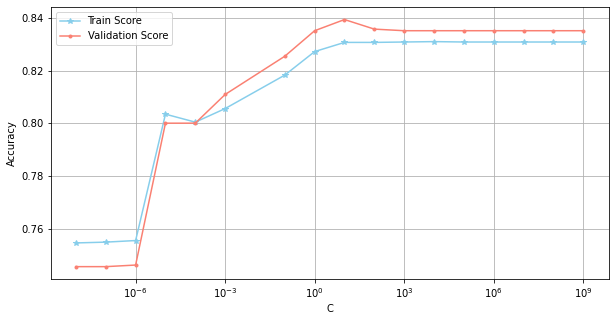

In [41]:
# Looping over a range of values for C and calculating the scores on training and validation sets

# Initializing placeholder lists
train_scores =[]
validation_scores =[]

# Creating a list of values of C
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Looping through a range of values for C
for c in C_range:
    
    # Instantiating the Logistic Regression model
    logreg3 = LogisticRegression(penalty= 'l2', C=c)

    # Fitting the model to the scaled training data
    logreg_model = logreg3.fit(X_train_scaled, y_train)
    
    #Evaluating the model
    train_score = logreg_model.score(X_train_scaled, y_train)
    validation_score = logreg_model.score(X_validation_scaled, y_validation)

    # Appending the accuracies to the empty lists
    train_scores.append(train_score)
    validation_scores.append(validation_score)
    
    
#plotting the above results
plt.figure(figsize=(10, 5))
plt.plot(C_range,train_scores, label='Train Score',marker='*', c='skyblue')
plt.plot(C_range,validation_scores, label='Validation Score',marker='.', c='salmon')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [42]:
# Instantiating the Logistic Regression model
logreg = LogisticRegression(penalty= 'l2', C=10)

# Fitting the model to the scaled training data
logreg_model = logreg.fit(X_train_scaled, y_train)
    
#Evaluating the model
test_score = logreg_model.score(X_test_scaled, y_test)

#Printing the results
print(f'Test Score: {test_score:.3f}')
pred = logreg_model.predict(X_test_scaled)
print(f'Classification report validation set: \n\n {classification_report(y_test, pred)}')

Test Score: 0.776
Classification report validation set: 

               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [43]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_scaled, y_train)

# Evaluate its classification accuracy
print(f"DT training set accuracy: {DT_model.score(X_train_scaled, y_train)}")
print(f"DT validation set accuracy: {DT_model.score(X_validation_scaled, y_validation)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.9986408939897312
DT validation set accuracy: 0.7844202898550725
DT test set accuracy: 0.5706174591909156


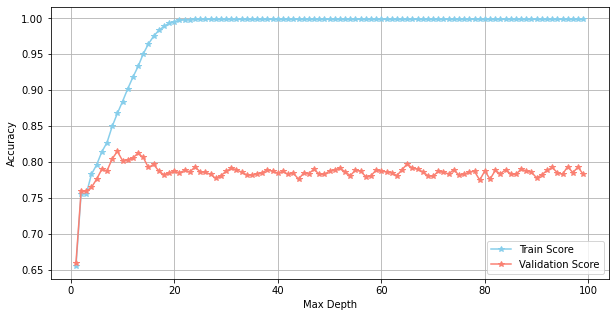

In [44]:
# Creating a range of max depth values to run the DT model with

depth_values = list(range(1,100))

# Instantiating empty lists to hold the train and validation accuracies
train_accs = []
validation_accs = []

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit the DT model
    dt_model = DecisionTreeClassifier(max_depth = d)
    dt_model.fit(X_train_scaled, y_train)
    
    # Evaluate on train & test data
    train_accs.append(dt_model.score(X_train_scaled, y_train))
    validation_accs.append(dt_model.score(X_validation_scaled, y_validation))
    
#plotting the above results
plt.figure(figsize=(10, 5))
plt.plot(depth_values, train_accs, label='Train Score',marker='*', c='skyblue')
plt.plot(depth_values,validation_accs, label='Validation Score',marker='*', c='salmon')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [45]:
#Instantiating the DT with max_depth = 6
final_dt_model = DecisionTreeClassifier(max_depth = 6)

# Fitting the model on the entire training data set
final_dt_model.fit(X_train_scaled, y_train)

# Evaluating the model
print(f'Training Score: {final_dt_model.score(X_train_scaled, y_train):.3f}')
print(f'Test Score: {final_dt_model.score(X_test_scaled, y_test):.3f}')
pred = final_dt_model.predict(X_test_scaled)
print(f'Classification report validation set: \n\n {classification_report(y_test, pred)}')

Training Score: 0.814
Test Score: 0.754
Classification report validation set: 

               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.71      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [46]:
#Instantiating XGBoost
XGB_model = XGBClassifier()
XGB_model.fit(X_train_scaled, y_train)

# Evaluating the model
print(f'Training Score: {XGB_model.score(X_train_scaled, y_train):.3f}')
print(f'Test Score: {XGB_model.score(X_test_scaled, y_test):.3f}')
pred = XGB_model.predict(X_test_scaled)
print(f'Classification report validation set: \n\n {classification_report(y_test, pred)}')

Training Score: 0.850
Test Score: 0.764
Classification report validation set: 

               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



In [52]:
#Instantiating Random Forest Model

rf_model = RandomForestClassifier(n_estimators=80)
rf_model.fit(X_train_scaled, y_train)
 

# Evaluating the model
print(f'Training Score: {rf_model.score(X_train_scaled, y_train):.3f}')
print(f'Test Score: {rf_model.score(X_test_scaled, y_test):.3f}')
pred = rf_model.predict(X_test_scaled)
print(f'Classification report validation set: \n\n {classification_report(y_test, pred)}')

Training Score: 0.999
Test Score: 0.772
Classification report validation set: 

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

